# <center>3ª Atividade de Aprendizado de Máquina</center>
# <center>Modelos Preditivos</center>
### <center><b><i>Anderson Martins Gomes</i></b></center>
## <center>Programa de Pós-graduação em Ciência da Computação - PPGCC/UECE</center>
### <center><i>andersonmg@gmail.com</i></center>

## <center><b>Resumo</b></center>
<p style="margin-left: 50px; margin-right: 50px; text-align: justify">Neste trabalho são realizados experimentos para se comparar modelos preditivos, especialmente os vistos na disciplina de Aprendizado de Máquina (KNN, Naive Bayes, Árvore de Decisão, MLP e SVM) e seus resultados na resolução de um problema de classificação. Para tal, será utilizada a base de dados <i>UCI Machine Learning Repository: Wine Quality Data Set</i>. Esse conjunto apresenta informações relacionadas à qualidade de vinhos brancos e tintos. Na análise, optou-se exclusivamente pelo subconjunto dos vinhos tintos, pretendo-se prever sua qualidade a partir das características disponíveis. Entre os algoritmos solicitados no trabalho, o melhor desempenho foi obtido com o SVM, que obteve, em um dos cenários testados, uma acurácia de 51.5%. Entretanto, após experimentos envolvendo outros algoritmos, o melhor resultado obtido foi com o algoritmo Histogram-Based Gradient Boosting, com uma acurácia de 91.9%. Para a execução e comparação dos algoritmos, utilizou-se uma biblioteca de AutoML construída pelo aluno ao longo do curso (GOMES, 2021). Trabalho inserido no âmbito da disciplina de Aprendizado de Máquina, professora Ana Luiza Bessa, Programa de Pós-graduação em Ciência da Computação, Universidade Estadual do Ceará.</p>

# <b>1. Introdução</b>

<p style="text-align: justify; text-indent:50px;">
Problemas de aprendizado de máquina supervisionado são aqueles nos quais é possível prever uma variável alvo a partir de outras existentes no <i>dataset</i> de referência. As tarefas supervisionadas se distinguem pelo tipo dos rótulos dos dados: discreto, no caso de classificação; e contínuo, no caso de regressão (CARVALHO, 2011, p. 6).
</p>
<p style="text-align: justify; text-indent:50px;">
Este trabalho aborda um problema de aprendizado supervisionado, especificamente de classificação, uma vez que a variável alvo (<i>target</i>) é a qualidade dos vinhos (atributo 'quality'), cujos valores pertencem a um domínio discreto, conforme demonstrado abaixo:
</p>

In [1]:
import ds_utils as util
dsWineRed = util.getDSWine_RED()
dsWineRed['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<p style="text-align: justify; text-indent:50px;">
Para a execução dos algoritmos e comparação dos resultados, utilizou-se uma biblioteca de AutoML construída pelo aluno ao longo da disciplina (GOMES, 2021). Em linhas gerais, a biblioteca encapsula as funções básicas de preparação do <i>dataset</i>, <i>features engineering</i> e otimização de hiper-parâmetros. 
</p>
<p style="text-align: justify; text-indent:50px;">
Assim, a biblioteca se encarrega de executar as combinações entre o conjunto de features, o conjunto de algoritmos e de hiper-parâmetros, entregando os resultados conforme as métricas que forem definidas para o problema.
</p>
<p style="text-align: justify; text-indent:50px;">
Na seção pertinente serão detalhados alguns trechos principais da biblioteca de AutoML, importantes para o entendimento da resolução das questões.
</p>

# <b>2. Modelos Preditivos</b>
<p style="text-align: justify; text-indent:50px;">A seguir será realizada uma breve contextualização sobre os modelos preditivos selecionados para este trabalho.</p>
## <b>2.1 KNN</b>
<p style="text-align: justify; text-indent:50px;">O algoritmo <i>K-nearest neighbors</i> (K-NN) é um método não paramétrico de classificação que pode ser utilizado tanto para problemas de regressão quanto para problemas de classificação.</p>
<p style="text-align: justify; text-indent:50px;">A ideia central do algoritmo é utilizar-se do cálculo da distância da observação cuja classe é desconhecida em relação aos demais, cujas classes já são conhecidas. A distância pode ser calculada por diversos métodos, como o Euclidiano, o de Hamming, o de Manhattan e o de Markowski.</p>
<p style="text-align: justify; text-indent:50px;">No K-NN a estrutura do modelo será determinada pelo <i>dataset utilizado</i>. Este algoritmo também é conhecido como de aprendizado lento ou melhor dizendo, é um algoritmo preguiçoso (<i>lazy</i>). Os algoritmos do tipo <i>lazy</i>, não necessitam de dados de treinamento para se gerar o modelo, o que diminui em partes o processo inicial, mas em contrapartida gerará uma necessidade de analise posterior mais apurada.</p>
## <b>2.2 Naive Bayes</b>
<p style="text-align: justify; text-indent:50px;">O algoritmo Naive Bayes é um classificador probabilístico utilizado em tarefas de aprendizado supervisionado, cujo funcionamento se baseia no Teoremo de Bayes.</p>
<p style="text-align: justify; text-indent:50px;">A ideia central do método é considerar, conforme Teorema de Bayes, que as <i>features</i> são independentes entre si, ou seja, que a presença de uma não afeta quaisquer uma das outras. A partir dessa premissa, o algoritmo calcula a probabilidade da observação pertencer a uma determinada classe a partir dos dados disponíveis nas variáveis independentes.</p>
<p style="text-align: justify; text-indent:50px;">Seu principal ponto forte é a capacidade de performar bem com um pequeno conjunto de dados de treinamento, principalmente quando as variáveis independentes são categóricas. Por outro lado, para grande parte das aplicações reais, a premissa de independência entre as variáveis não se confirma, o que afeta o desempenho do método.</p>
## <b>2.3 Árvore de Decisão</b>
<p style="text-align: justify; text-indent:50px;">O algoritmo Árvore de Decisão utiliza modelos de árvore para tomada de decisão em problemas de classificação. Nele, as folhas representam as classes e os galhos representam um determinado conjunto de testes sobre os valores das <i>features</i>.</p>
<p style="text-align: justify; text-indent:50px;">As Árvores de Decisão exigem menos esforço na fase de preparação de dados. Desnormalização e ausência de valores em determinadas observações, por exemplo, não afetam o modelo. É também um método fácil e intuitivo, o que permite um bom nível de "explicabilidade".</p>
<p style="text-align: justify; text-indent:50px;">Por outro lado, pequenas alterações nos dados podem afetar decisivamente o modelo. Frequentemente a fase de treinamento tem um alto custo computacional e não pode ser aplicada para problemas de regressão.</p>
## <b>2.4 MLP</b>
<p style="text-align: justify; text-indent:50px;">Multilayer Perceptron (MLP) é um tipo de rede neural artificial simples, composto por três camadas de nós: uma camada de entrada (<i>input layer</i>), uma camada oculta (<i>hidden layer</i>) e uma camada de saída (<i>output layer</i>).</p>
<p style="text-align: justify; text-indent:50px;">O MLP utiliza uma técnica de aprendizado supervisionado chamada <i>backpropagation</i> na fase de treinamento. O treinamento então ocorre quando o perceptron muda seus pesos a partir da análise do erro de saída em comparação ao resultado esperado.</p>
<p style="text-align: justify; text-indent:50px;">O método MLP pode ser aplicado para resolver complexos problemas não lineares. Funciona bem com grandes conjuntos de dados, ao mesmo tempo que consegue boa acurácia com menores <i>datasets</i>. Sua principal desvantagem é o alto custo computacional na fase de treinamento.</p>
## <b>2.5 SVM</b>
<p style="text-align: justify; text-indent:50px;">O algoritmo Support Vector Machines (SVM) é um método de aprendizado supervisionado que se utiliza da otimização de hiperplanos de um espaço n-dimensional (n igual ao número de <i>features</i>) para separar as distintas classes do conjunto de dados.</p>
<p style="text-align: justify; text-indent:50px;">Para tal, utiliza-se do cálculo de distância entre os pontos para definir a fronteira de decisão. Por meio de uma técnica chamada <i>Kernel Trick</i>, o método é capaz de aumentar artificialmente a dimensionalidade dos dados, a fim de obter a melhor separação entre as classes.</p>
<p style="text-align: justify; text-indent:50px;">Seu principal ponto forte é funcionar bem quando o número de dimensões é maior do que o número de exemplos. Por outro lado, é tecnicamente inviável para grande conjunto de dados, devido aos custos computacionais envolvidos.</p>

# <b>3. Metodologia</b>
<p style="text-align: justify; text-indent:50px;">Como já explicitado na Introdução, para implementação dos experimentos, optou-se por encapsular, em uma biblioteca própria escrita em Python, as funcionalidades referentes às fases básicas de resolução de um problema de <i>Machine Learning</i>, quais sejam, o pré-processamento, a seleção de atributos, o treinamento do modelo, a otimização dos hiper-parâmetros e a obtenção dos resultados por meio das métricas de praxe.</p>
<p style="text-align: justify; text-indent:50px;">
Seguindo o comando das questões, executou-se primeiramente a rotina de AutoML para o <i>dataset</i>, as <i>features</i>, os algoritmos e os hiper-parâmetros requeridos, utilizando-se o método de <i>GridSearch</i>, que é exaustivo, ou seja, testa todas as combinações de modelos possíveis.
</p>
<p style="text-align: justify; text-indent:50px;">
Em seguida, em uma nova leva de experimentos que objetivou o atingimento de melhores resultados, executou-se a biblioteca de AutoML em suas configurações padrão principais, quais sejam:<br/>
- Inclusão de outros algoritmos de <i>Machine Learning</i>, incluindo métodos <i>ensemble</i>;<br/>
- Uso de técnicas de Engenharia de Atributos para selecionar na fase de pré-processamento as <i>features</i> mais significativas;<br/>
- Uso de algoritmo genético para seleção do sub-conjunto de algoritmo/<i>features</i> ótimo; <br/>
- Uso de busca bayesiana com validação cruzada na seleção de hiper-parâmetros;<br/>
</p>
<p style="text-align: justify; text-indent:50px;">
Ao final, comparou-se os resultados em termos das métricas solicitadas no trabalho (Acurácia, Precisão, Recall, R-score e Curva ROC), além de se incluir análises relacionadas ao tempo para treinamento, tempo para predição e uso de memória.
</p>

# <b>4. Resultados</b>

<p style="text-align: justify; text-indent:50px;">Carregando a base de dados e exibindo alguma informações básicas sobre o <i>dataset</i>:</p>

In [2]:
dsWineRed.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
dsWineRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dsWineRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
from autoML import AutoML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Definição dos classificadores conforme especificação do trabalho
#O formato de dicionário é o padrão requerido pela biblioteca AutoML.
#Nele, temos a chave como o algoritmo classificador e o valor como um dicionário com as configurações dos hiper-parâmetros pertinentes.
ALGORITHMS = {
    KNeighborsClassifier:{
        "n_neighbors": [3,11,17] #Utilizando três diferentes valores de K
        , "metric": ['euclidean', 'manhattan', 'minkowski'] #Utilizando três diferentes métricas de distâncias
        , "n_jobs": [-1] #Utilizando todas as possibilidades de número de jobs
        },
    GaussianNB:{ #Naive Bayes com distribuição gaussiana
        "priors": [None], #Não há variação de parâmetros para este algoritmo
        },
    MultinomialNB:{ #Naive Bayes com distribuição multinomial
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    BernoulliNB:{ #Naive Bayes com distribuição Bernoulli
        "alpha": [1.0], #Não há variação de parâmetros para este algoritmo
        },
    DecisionTreeClassifier:{
        "criterion": ["gini", "entropy"], #Utilizando índice Gini e Entropia para o cálculo de qualidade da divisão dos nós
        },
    MLPClassifier:{
        "learning_rate": ['constant', 'invscaling', 'adaptive'], #Utilizando diferentes valores de taxa de aprendizagem
        'momentum' : [0.1, 0.5, 0.9], #Utilizando diferentes valores de momentum
        },        
    SVC:{
        "kernel": ['linear', 'rbf', 'poly'], #Utilizando diferentes kernels
        "C": [0.001, 1, 1000], #Utilizando diferentes valores de C
        "gamma": ["auto", "scale"], #Utilizando diferentes valores de gamma
        "degree": [1, 3, 5], #Utilizando diferentes valores de grau
        "probability": [True] #Utilizando a probabilidade
        },
}

METRICS = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc'] #Definição das métricas utilizadas

<p style="text-align: justify; text-indent:50px;">
Com os parâmetros básicos definidos, tem-se a criação do objeto de AutoML. Em sua instanciação já é executada uma série de operações de pré-processamento. As principais encontram-se detalhadas abaixo (para uma referência completa, ver (GOMES, 2021)):
</p>

<b>Exclusão de valores faltantes:</b>
```python
    print('Original dataset dimensions:', ds_source.shape)
    #NaN values
    ds = ds_source.dropna()
    print('Dataset dimensions after drop NaN values:', ds.shape)
    #shuffle data to minimize bias tendency
    ds = ds.sample(frac=1)
```
<b>Processando o <i>target</i>, selecionando o tipo de problema e as métricas a serem utilizadas:</b>
```python
    #setting Y
    self.y_colname = y_colname
    self.y_full = ds[[self.y_colname]]
    self.__y_encoder = None
    self.y = np.asanyarray(self.y_full).reshape(-1, 1).ravel()
    self.y_is_binary = False
    self.y_classes = None
    if self.YisCategorical():
        print('ML problem type: Classification')
        #encoding
        self.__y_encoder = OrdinalEncoder(dtype=int)
        self.y_full = pd.DataFrame(self.__y_encoder.fit_transform(self.y_full), columns=[self.y_colname])
        self.y_classes = np.sort(self.y_full[self.y_colname].unique())
        self.y_is_binary = len(self.y_classes) == 2
        if not self.y_is_binary: #multiclass 
            #adjusting the metrics for multiclass target
            for i, m in enumerate(self.metrics_classification_list):
                if m == 'f1':
                    self.metrics_classification_list[i] = 'f1_weighted'
                elif m == 'roc_auc':
                    self.metrics_classification_list[i] = 'roc_auc_ovr_weighted'
                elif m == 'accuracy':
                    self.metrics_classification_list[i] = 'balanced_accuracy'
                elif m == 'recall':
                    self.metrics_classification_list[i] = 'recall_weighted'
                elif m == 'precision':
                    self.metrics_classification_list[i] = 'precision_weighted'
    else:
        print('ML problem type: Regression')

    print('   Applied metrics:', self.metrics_classification_list)
```  
<b>Processando as <i>features</i> e transformando as variáveis categóricas por meio da técnica de <i>One Hot Encoder</i>:</b>
```python
    #setting X
    self.X = ds.drop(self.y_colname, axis=1)
    self.__onehot_encoder = OneHotEncoder(sparse=False, dtype=int)

    hot_columns = []
    str_columns = []
    for i, col in enumerate(self.X.columns):
        if self.X.dtypes[i] == object: 
            if len(self.X[col].unique()) <= self.__unique_categoric_limit:
                hot_columns.append(col)
            else:
                str_columns.append(col)
    
    if len(str_columns) > 0:
        self.X = self.X.drop(str_columns, axis=1)
        
    if len(hot_columns) > 0:
        print('One hot encoder columns:', hot_columns)
        self.__onehot_encoder.fit(self.X[hot_columns])
        
        hot_cols_names = []
        
        for i, name in enumerate(self.__onehot_encoder.feature_names_in_):
            for cat in self.__onehot_encoder.categories_[i]:
                hot_cols_names.append(name + '_' + cat.lower().replace(' ','_'))
                
        self.X = pd.concat([self.X.drop(hot_columns, axis=1)
                            , pd.DataFrame(self.__onehot_encoder.transform(self.X[hot_columns])
                                        , columns=hot_cols_names)], axis=1)
```  
<b>Normalizando o <i>X</i> e dividindo o <i>dataset</i> em porções de treino e teste:</b>
```python
    #normalizing the variables
    print('Normalizing the variables...')
    self.scaler = preprocessing.MinMaxScaler()
    self.X = pd.DataFrame(self.scaler.fit_transform(self.X), columns=self.X.columns) 

    #splitting dataset
    print('Splitting dataset...')
    self.X_train, self.X_test, self.y_train, self.y_test = self.__train_test_split()
    print('   X_train dimensions:', self.X_train.shape)
    self.y_train = np.asanyarray(self.y_train).reshape(-1, 1).ravel()
    self.y_test = np.asanyarray(self.y_test).reshape(-1, 1).ravel()
```  
<b>Realizando o <i>features engineering</i>, caso o AutoML tenha sido configurado para isto.</b> 
<p style="text-align: justify; text-indent:50px;">
São realizados dois tipos de processamento. No primeiro compara-se a correlação de cada feature com o Y. Caso não esteja acima de um determinado limite (variável <i>self.__min_x_y_correlation_rate</i>), a coluna é descartada. Na outra abordagem, testa-se cada variável com as outras. Caso a correlação esteja acima de um determinado nível (1 - o valor da variável <i>self.__min_x_y_correlation_rate</i>), considera-se as <i>features</i> redundantes, excluindo-se uma delas.
</p>

```python

    def features_corr_level_Y(i, X, y, threshold):
        #features engineering
        #testing correlation between X and Y
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            corr = sta.pearsonr(X, y)[0]
        if ( (corr != corr) #NaN value for correlation because constant feature
            or (abs(corr) < threshold)
            ):
            return None#x[i] below the threshold
        #else: feature ok with Y
        return i

    def features_corr_level_X(i, X_0, X_i, threshold):
        #features engineering
        #testing correlation between X_0 and X_i
        for i in range(0, X_i.shape[1]):
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                corr = sta.pearsonr(X_0, X_i.iloc[:,i])[0]
            if ( (corr != corr) #NaN value for correlation because constant feature
                or (abs(corr) > threshold)
                ):
                return None#x[i] above the threshold
        #else: feature ok, no redundance
        return i

    #running feature engineering in paralel
    if features_engineering:
        n_cols = self.X_train.shape[1]
        print('Features engineering - Testing correlation with Y...')
        considered_features = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(features_corr_level_Y)
                                (i
                                , self.X_train.iloc[:,i]
                                , self.y_train
                                , self.__min_x_y_correlation_rate)
                                for i in range(0, n_cols))
        considered_features = [x for x in considered_features if x is not None]
        self.X_train = self.X_train.iloc[:,considered_features]
        self.X_test = self.X_test.iloc[:,considered_features]
        
        def n_features_2str():
            return "{:.2f}".format(100*(1-len(considered_features)/self.X.shape[1])) + "% (" + str(len(considered_features)) + " remained)"
        
        print('   Features engineering - Features reduction after correlation test with Y:'
            , n_features_2str())
        
        print('Features engineering - Testing redudance between features...')    
        
        n_cols = self.X_train.shape[1]
        considered_features = Parallel(n_jobs=-1, backend="multiprocessing")(delayed(features_corr_level_X)
                                (i
                                ,self.X_train.iloc[:,i]
                                , self.X_train.iloc[:,i+1:]
                                , (1-self.__min_x_y_correlation_rate))
                                for i in range(0, n_cols-1))

        considered_features = [x for x in considered_features if x is not None]
        self.X_train = self.X_train.iloc[:,considered_features]
        self.X_test = self.X_test.iloc[:,considered_features]
        
        print('   Features engineering - Features reduction after redudance test:'
            , n_features_2str())
```

In [6]:
#Definição do objeto AutoML
automl = AutoML(dsWineRed
                , y_colname='quality' 
                , algorithms=ALGORITHMS
                , ds_name='experimento_1'
                , metrics=METRICS
                , ngen=1 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , features_engineering=False #Não fazer features engineering (usará todas as features do dataset)
                , grid_search=True #Utilizar grid search em vez de Bayesian optimization
                )

Original dataset dimensions: (1599, 12)
Dataset dimensions after drop NaN values: (1599, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1279, 11)


<p style="text-align: justify; text-indent:50px;">
Segue-se para o treinamento propriamento dito (usando algoritmo genético) e a exibição da tabela comparativa de resultados. Abaixo reprodução dos principais trechos seguido da execução do método "getResults()".
</p>

<b>Função <i>fitness</i> do algoritmo genético:</b>

```python

def evaluation(individual, automl_obj):
    def float2bigint(float_value):
        if math.isnan(float_value):
            float_value = -1
        return [int(float_value*100000)]
    
    #print(individual)
    
    algo = individual[-automl_obj.n_bits_algos:]
    algo = bautil.ba2int(bitarray(algo)) % len(automl_obj.selected_algos)
    
    algo = automl_obj.selected_algos[algo]
    
    col_tuple = individual[:len(automl_obj.X_bitmap)-automl_obj.n_bits_algos]
    col_tuple = tuple([automl_obj.X_train.columns[i] for i, c in enumerate(col_tuple) if c == 1])
    
    if len(col_tuple)==0:
        return float2bigint(-1)
    
    def is_ensemble(a):
        return isinstance(a, VotingClassifier) or isinstance(a, StackingClassifier)
    
    if is_ensemble(algo):
        #getting the top 3 best results group by algorithm
        best_estimators = []
        automl_obj.results.sort_values(by=automl_obj.main_metric, ascending=False, inplace=True)
        for row in automl_obj.results.iterrows():
            if len(best_estimators)==3:
                break
            candidate_algo = row[1]['algorithm']
            if ((candidate_algo not in best_estimators)
                and (not is_ensemble(candidate_algo))):
                best_estimators.append(candidate_algo)
        algo.estimators = list(zip(['e'+str(i) for i in range(1,len(best_estimators)+1)],best_estimators))
        
    X_train2 = automl_obj.X_train[list(col_tuple)]
    X_test2 = automl_obj.X_test[list(col_tuple)]
    
    if len(col_tuple)==1:
        X_train2 = np.asanyarray(X_train2).reshape(-1, 1)
        X_test2 = np.asanyarray(X_test2).reshape(-1, 1)

    scoring_list = automl_obj.getMetrics()
    
    #tunning parameters
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        if automl_obj.grid_search:
            opt = GridSearchCV(estimator=algo, param_grid=automl_obj.algorithms[algo]
                                , scoring=automl_obj.main_metric
                                , cv=5
                                , verbose=0, n_jobs=-1
                                )
        else:
            opt = BayesSearchCV(estimator=algo, search_spaces=automl_obj.algorithms[algo]
                                , scoring=automl_obj.main_metric
                                , n_iter=30, cv=5
                                , verbose=0, n_jobs=-1, random_state=automl_obj.RANDOM_STATE
                                )
        opt.fit(X_train2, automl_obj.y_train)

    def fit_score():
        estimator = algo.set_params(**params)
        row = {'algorithm': estimator
               , 'params': params
               , 'features': col_tuple
               , 'n_features': len(col_tuple)
               }

        t0 = time.perf_counter()
        estimator.fit(X_train2, automl_obj.y_train)
        row['train_time'] = time.perf_counter() - t0 #train_time
        
        t0 = time.perf_counter()
        
        for scor_str in scoring_list:
            row[scor_str] = (get_scorer(scor_str)(estimator, X_test2, automl_obj.y_test))
        
        row['predict_time'] = (time.perf_counter() - t0)/len(automl_obj.y_test) #predict_time, considering one sample at a time
        
        if automl_obj.YisCategorical():
            #confusion matrix
            row['confusion_matrix'] = confusion_matrix(automl_obj.y_test, estimator.predict(X_test2), labels=automl_obj.y_classes)
        
        return row
        
    best_score = -1.0
    #dataframe format: ['algorithm', 'params', 'features', 'n_features', 'train_time', 'predict_time', 'mem_max', <metrics>]
    for params in opt.cv_results_['params']:
        #seeking for some previous result
        previous_result = automl_obj.results[(automl_obj.results['algorithm'] == algo) 
                                             & (automl_obj.results['params'] == params)
                                            & (automl_obj.results['features'] == col_tuple)]
        if previous_result.shape[0]>0:
            continue
        #else 
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mem_max, row_result = memory_usage(proc=(fit_score)
                                                , max_usage=True
                                                , retval=True
                                                , include_children=True)
        row_result['mem_max'] = mem_max

        automl_obj.results.loc[len(automl_obj.results)] = row_result

        if row_result[automl_obj.main_metric] > best_score:
            best_score = row_result[automl_obj.main_metric]
            
        log_msg = '   *Model trained: ' + str(scoring_list[0]) 
        log_msg += ' = {:.5f}'.format(row_result[automl_obj.main_metric]) 
        log_msg += ' | ' + str(algo)[:str(algo).find('(')] 
        log_msg += ' | ' + str(len(col_tuple)) + ' features' 
        log_msg += ' | ' + str(params)[str(params).find('[')+1:str(params).find(']')]

        print(log_msg[:150].replace('\n',''))#show only the 150 first caracteres
 
    flushResults(automl_obj)
    return float2bigint(best_score) #main metric
```

<b>Função que configura a primeira geração para o algoritmo genético, forçando que todas as <i>features</i> sejam utilizadas na primeira rodada:</b>

```python
def gen_first_people(n_features, n_algos, n_bits_algos):
    first_people = []
    X_bitmap = bautil.int2ba(1, n_features)
    X_bitmap.setall(1)
    for i in range(n_algos):
        c_bitmap = []
        c_bitmap.extend(list(X_bitmap))
        c_bitmap.extend(list(bautil.int2ba(i, n_bits_algos)))
        first_people.append(c_bitmap)
    return first_people
```
<b>Função de configuração do algoritmo genético:</b>

```python
def ga_toolbox(automl_obj):
    #genetics algorithm: creating types
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    #multiprocessing
    toolbox = base.Toolbox()
    if not(automl_obj.pool is None):
        #toolbox.register("map", pool.map) #TODO: check if it works
        pass

    #genetics algorithm: initialization
    def initPopulation(pcls, ind_init):
        return pcls(ind_init(c) for c in gen_first_people(automl_obj.X_train.shape[1], len(automl_obj.selected_algos), automl_obj.n_bits_algos))
    toolbox.register("population", initPopulation, list, creator.Individual)
    
    #genetics algorithm: operators
    toolbox.register("evaluate", evaluation, automl_obj=automl_obj)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)
    return toolbox
```



In [7]:
automl.getResults()

Selected algorithms: ['KNeighborsClassifier', 'GaussianNB', 'MultinomialNB', 'BernoulliNB', 'DecisionTreeClassifier', 'MLPClassifier', 'SVC']
Nº of training possible basic combinations: 28658.0 (4094.0 features combinations, 7 algorithms)
   *Model trained: balanced_accuracy = 0.29718 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 3}
   *Model trained: balanced_accuracy = 0.30286 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 11}
   *Model trained: balanced_accuracy = 0.30077 | KNeighborsClassifier | 11 features | {'metric': 'euclidean', 'n_neighbors': 17}
   *Model trained: balanced_accuracy = 0.27293 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_neighbors': 3}
   *Model trained: balanced_accuracy = 0.29570 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_neighbors': 11}
   *Model trained: balanced_accuracy = 0.29138 | KNeighborsClassifier | 11 features | {'metric': 'manhattan', 'n_neigh

,train_order,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,70,SVC,"{'C': 1000, 'degree': 3, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",149.661242,0.000147,246.804688,0.479180,0.622245,0.633508,0.615625,0.750815
1,12,DecisionTreeClassifier,{'criterion': 'gini'},"11: 'fixed acidity', 'volatile acidity', 'citr...",0.008884,0.000032,1436.164062,0.425642,0.628274,0.633615,0.631250,0.712269
2,76,SVC,"{'C': 1000, 'degree': 5, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",277.248237,0.000137,246.000000,0.411364,0.630332,0.640126,0.621875,0.697676
3,13,DecisionTreeClassifier,{'criterion': 'entropy'},"11: 'fixed acidity', 'volatile acidity', 'citr...",0.014578,0.000031,1436.289062,0.409725,0.624091,0.627435,0.625000,0.710132
4,63,SVC,"{'C': 1000, 'degree': 1, 'gamma': 'scale', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",1.856922,0.000413,245.843750,0.397668,0.632456,0.644804,0.621875,0.779536
...,...,...,...,...,...,...,...,...,...,...,...,...
72,24,SVC,"{'C': 0.001, 'degree': 1, 'gamma': 'auto', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.333322,0.000527,244.550781,0.166667,0.253509,0.180625,0.425000,0.750423
73,33,SVC,"{'C': 0.001, 'degree': 3, 'gamma': 'scale', 'k...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.339694,0.000528,244.734375,0.166667,0.253509,0.180625,0.425000,0.790256
74,39,SVC,"{'C': 0.001, 'degree': 5, 'gamma': 'scale', 'k...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.343849,0.000528,245.101562,0.166667,0.253509,0.180625,0.425000,0.789457
75,36,SVC,"{'C': 0.001, 'degree': 5, 'gamma': 'auto', 'ke...","11: 'fixed acidity', 'volatile acidity', 'citr...",0.328874,0.000533,245.585938,0.166667,0.253509,0.180625,0.425000,0.750285


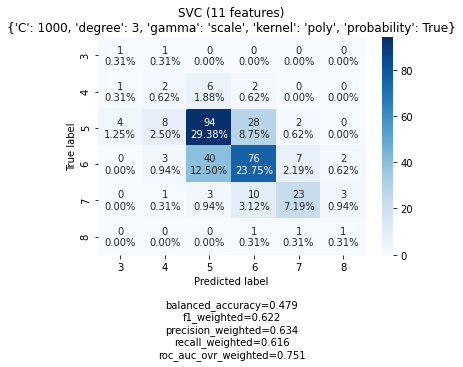

In [8]:
automl.getBestConfusionMatrix();

<p style="text-align: justify; text-indent:50px;">
Executou-se novo experimento, agora com as configurações do AutoML permitindo o uso de outros algoritmos (16 no total), incluindo <i>ensembles</i>, e com inúmeras configurações de hiper-parâmetros otimizados por meio do método BayesSearchCV. Além disso, habilitou-se o recurso de engenharia de atributos e se configurou o algoritmo genético com o limite de apenas 5 gerações, considerando a alta exigência computacional. 
</p>

<p style="text-align: justify; text-indent:50px;">
Abaixo o trecho de código da biblioteca de AutoML que define os algoritmos e o espaço de busca dos hiper-parâmetros:
</p>

```python
class AutoML:
    ALGORITHMS = {
        #classifiers
        #https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
        KNeighborsClassifier(n_jobs=-1): 
            {"n_neighbors": [3,5,7,9,11,13,15,17],
             "p": [2, 3],
             },
        SVC(probability=True):
            {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "gamma": ["auto", "scale"],
             "class_weight": ["balanced", None]},
        GaussianProcessClassifier(n_jobs=-1):{
            "copy_X_train": [False],
            "warm_start": [True, False],},
        DecisionTreeClassifier():{
            "criterion": ["gini", "entropy"],
            },
        RandomForestClassifier(n_jobs=-1):{
            "n_estimators": [120,300,500,800,1200],
            "max_depth": [None, 5, 8, 15, 20, 25, 30],
            "min_samples_split": [2, 5, 10, 15, 100],
            "min_samples_leaf": [1, 2, 5, 10],
            "max_features": [None, "sqrt", "log2"],
            },
        MLPClassifier():{
            "learning_rate": ['constant', 'invscaling', 'adaptive'], 
            'momentum' : [0.1, 0.5, 0.9], 
            },
        AdaBoostClassifier():{
            "algorithm": ["SAMME", "SAMME.R"],
            },
        GaussianNB():{
            "priors": [None],
            },
        QuadraticDiscriminantAnalysis():{
            "priors": [None],
            },
        XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'):{
            "eta": [0.01, 0.015, 0.025, 0.05, 0.1],
            "gamma": [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
            "max_depth": [3, 5, 7, 9, 12, 15, 17, 25],
            "min_child_weight": [1, 3, 5, 7],
            "subsample": [0.6, 0.7, 0.8, 0.9, 1],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1],
            "lambda": [0.01,0.1,1],
            "alpha": [0, 0.1, 0.5, 1],
            },
        MultinomialNB():{
            "fit_prior": [True, False],
            }, 
        GradientBoostingClassifier():{
            "loss": ["deviance"],
            },
        HistGradientBoostingClassifier():{
            "warm_start": [True, False],
            },
        #TPOTClassifier(verbosity=0, n_jobs=-1):{},
        linear_model.LinearRegression(n_jobs=-1):{
            "fit_intercept": [True, False],
            },
        linear_model.LogisticRegression(n_jobs=-1):{
            "C": [0.001, 0.01, 0.1, 1, 10,
                  100, 1000],
            },
        VotingClassifier(estimators=[], n_jobs=-1):{
            "voting": ["soft"],
            },
        StackingClassifier(estimators=[], n_jobs=-1):{
            "stack_method": ["auto"],
            },
        #regressors        
        XGBRegressor():{},
        XGBRFRegressor():{},
        svm.SVR():{},
        tree.DecisionTreeRegressor():{},
        neighbors.KNeighborsRegressor():{},
        GradientBoostingRegressor():{},    
    }  
```    

<p style="text-align: justify; text-indent:50px;">
Construtor da classe com as configurações padrão:
</p>

```python
    def __init__(self, ds_source, y_colname = 'y'
                 , algorithms = ALGORITHMS
                 , unique_categoric_limit = 10 
                 , min_x_y_correlation_rate = 0.01
                 , pool = None
                 , ds_name = None
                 , ngen = 10
                 , metrics = None
                 , features_engineering = True
                 , grid_search = False
                 ) -> None:
```

In [9]:
automl2 = AutoML(dsWineRed
                , y_colname='quality' 
                , ds_name='experimento_2'
                , metrics=METRICS #mesmas métricas definidas originalmente para o experimento 1
                , ngen=5 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , n_inter_bayessearch=10 #Número de iterações do Bayesian optimization
                )
automl2.getResults()

Original dataset dimensions: (1599, 12)
Dataset dimensions after drop NaN values: (1599, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (1279, 11)
Features engineering - Testing correlation with Y...
   Features engineering - Features reduction after correlation test with Y: 9.09% (10 remained)
Features engineering - Testing redudance between features...
   Features engineering - Features reduction after redudance test: 18.18% (9 remained)
Selected algorithms: ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis', 'XGBClassifier', 'MultinomialNB', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'LogisticRegression', 'VotingClassifier', 'StackingCla

C:\Users\PRF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   *Model trained: balanced_accuracy = 0.29678 | QuadraticDiscriminantAnalysis | 9 features | {'priors': None}
   *Model trained: balanced_accuracy = 0.30060 | XGBClassifier | 9 features | {'alpha': 1.0, 'colsample_bytree': 0.8, 'eta': 0.05, 'eval_metric': 'mlo
   *Model trained: balanced_accuracy = 0.27140 | XGBClassifier | 9 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.05, 'eval_metric': 'mlo
   *Model trained: balanced_accuracy = 0.28277 | XGBClassifier | 9 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.015, 'eval_metric': 'ml
   *Model trained: balanced_accuracy = 0.30622 | XGBClassifier | 9 features | {'alpha': 0.5, 'colsample_bytree': 0.9, 'eta': 0.05, 'eval_metric': 'mlo
   *Model trained: balanced_accuracy = 0.30101 | XGBClassifier | 9 features | {'alpha': 0.5, 'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'mlog
   *Model trained: balanced_accuracy = 0.30745 | XGBClassifier | 9 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.05, 'ev

C:\Users\PRF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   *Model trained: balanced_accuracy = 0.27612 | QuadraticDiscriminantAnalysis | 8 features | {'priors': None}
   *Model trained: balanced_accuracy = 0.26618 | RandomForestClassifier | 8 features | {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1
   *Model trained: balanced_accuracy = 0.28897 | RandomForestClassifier | 8 features | {'max_depth': 25, 'max_features': None, 'min_samples_leaf': 5, 
   *Model trained: balanced_accuracy = 0.30921 | RandomForestClassifier | 8 features | {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2
   *Model trained: balanced_accuracy = 0.25146 | RandomForestClassifier | 8 features | {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 5
   *Model trained: balanced_accuracy = 0.27540 | RandomForestClassifier | 8 features | {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1
   *Model trained: balanced_accuracy = 0.28912 | RandomForestClassifier | 8 features | {'max_depth': 25, 'max_features': None, 'min_sa

,train_order,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,127,SVC,"{'C': 10.0, 'class_weight': 'balanced', 'gamma...","8: 'sulphates', 'pH', 'density', 'total sulfur...",0.426410,0.000501,2405.750000,0.515960,0.511368,0.576183,0.478125,0.763072
1,14,SVC,"{'C': 10.0, 'class_weight': 'balanced', 'gamma...","9: 'sulphates', 'pH', 'density', 'total sulfur...",0.451154,0.000562,1451.355469,0.500035,0.540132,0.602993,0.509375,0.773593
2,10,SVC,"{'C': 100.0, 'class_weight': 'balanced', 'gamm...","9: 'sulphates', 'pH', 'density', 'total sulfur...",0.623941,0.000487,1451.546875,0.489539,0.538968,0.580625,0.525000,0.766701
3,9,SVC,"{'C': 1000.0, 'class_weight': None, 'gamma': '...","9: 'sulphates', 'pH', 'density', 'total sulfur...",2.465231,0.000448,1450.734375,0.428559,0.579713,0.583993,0.578125,0.741067
4,123,SVC,"{'C': 100.0, 'class_weight': 'balanced', 'gamm...","8: 'sulphates', 'pH', 'density', 'total sulfur...",0.791531,0.000528,2405.800781,0.417007,0.544518,0.579826,0.528125,0.760216
...,...,...,...,...,...,...,...,...,...,...,...,...
151,52,MultinomialNB,{'fit_prior': True},"9: 'sulphates', 'pH', 'density', 'total sulfur...",0.002073,0.000030,1830.234375,0.190028,0.397910,0.381305,0.478125,0.653715
152,61,LogisticRegression,"{'C': 0.001, 'n_jobs': -1}","9: 'sulphates', 'pH', 'density', 'total sulfur...",0.019655,0.000031,1864.382812,0.166667,0.253509,0.180625,0.425000,0.670924
153,73,LogisticRegression,"{'C': 0.001, 'n_jobs': -1}","7: 'sulphates', 'density', 'total sulfur dioxi...",0.024224,0.000044,2330.093750,0.166667,0.253509,0.180625,0.425000,0.643491
154,15,SVC,"{'C': 0.001, 'class_weight': None, 'gamma': 'a...","9: 'sulphates', 'pH', 'density', 'total sulfur...",0.322908,0.000536,1451.527344,0.166667,0.253509,0.180625,0.425000,0.676823


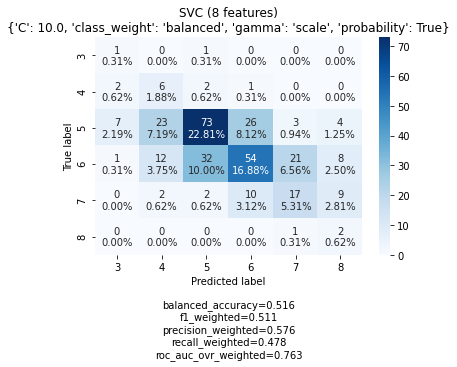

In [10]:
automl2.getBestConfusionMatrix();

<p style="text-align: justify; text-indent:50px;">Considerando os resultados dos experimentos anteriores, foi realizada uma investigação acerca do grau de desbalanceamento das classes. Conforme demonstrado abaixo, há um elevado desbalanceamento, principalmente em relação às classes 3, 4 e 8, que se encontram sub-representadas no <i>dataset</i> original.</p>

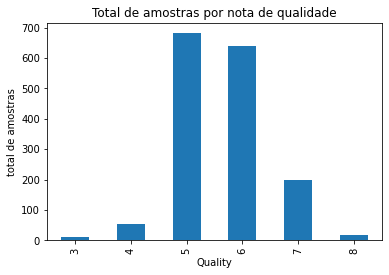

In [11]:
dist_classes = dsWineRed.quality.value_counts().sort_index()
# Mostra gráfico a dirtibuição de amostras por rótulo da variável dependente("target")
dist_classes.plot(xlabel='Quality', ylabel='total de amostras'
                              , kind='bar',title='Total de amostras por nota de qualidade');

<p style="text-align: justify; text-indent:50px;">Identificado o desbalanceamento, partiu-se para a resolução do problema utilizando-se o método de <i>Over-Sampling</i>, especificamente o método <i>RandomOverSampler</i> da biblioteca <i>Imbalanced-Learning</i>(LEMAÎTRE, 2017). Ou seja, aumentaram-se artificialmente os exemplos das classes minoritárias a fim de se obter um novo <i>dataset</i>, desta feita com um equilíbrio entre os números de observações das diversas classes.</p>

In [12]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Atribuir valores para X e y
X = dsWineRed.iloc[:,:-1]
y = dsWineRed.quality

# Mostrar as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

over = RandomOverSampler(random_state=0)

X_resampled, y_resampled = over.fit_resample(X, y)

# Mostrar as dimensões de X e y
print('Dimensões de X_resampled = ', X_resampled.shape)
print('Dimensões de y_resampled = ', y_resampled.shape)

Dimensões de X =  (1599, 11)
Dimensões de y =  (1599,)
Dimensões de X_resampled =  (4086, 11)
Dimensões de y_resampled =  (4086,)


In [13]:
import pandas as pd
df_oversampled = pd.DataFrame(X_resampled)
df_oversampled['target']= y_resampled
df_oversampled.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
2760,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
1579,6.2,0.56,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
3475,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6
2571,8.1,0.87,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4


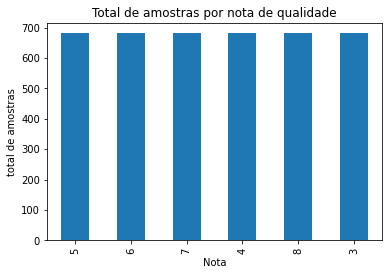

In [14]:
# Mostra gráfico a distribuição de amostras por rótulo da variável dependente("target")
df_oversampled.target.value_counts().plot(xlabel='Nota', ylabel='total de amostras'
                              , kind='bar',title='Total de amostras por nota de qualidade');

<p style="text-align: justify; text-indent:50px;">Executou-se, então, novo experimento utilizando-se o <i>dataset</i> balanceado.</p>

In [15]:
automl3 = AutoML(df_oversampled
                , y_colname='target' 
                , ds_name='experimento_3'
                , metrics=METRICS #mesmas métricas definidas originalmente para o experimento 1
                , ngen=5 #Número de gerações do algoritmo genético que otimiza a busca pela melhor combinação de features/algoritmos
                , n_inter_bayessearch=10 #Número de iterações do Bayesian optimization
                )
automl3.getResults()

Original dataset dimensions: (4086, 12)
Dataset dimensions after drop NaN values: (4086, 12)
ML problem type: Classification
   Applied metrics: ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted']
Normalizing the variables...
Splitting dataset...
   X_train dimensions: (3268, 11)
Features engineering - Testing correlation with Y...
   Features engineering - Features reduction after correlation test with Y: 0.00% (11 remained)
Features engineering - Testing redudance between features...
   Features engineering - Features reduction after redudance test: 9.09% (10 remained)
Selected algorithms: ['KNeighborsClassifier', 'SVC', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'MLPClassifier', 'AdaBoostClassifier', 'GaussianNB', 'QuadraticDiscriminantAnalysis', 'XGBClassifier', 'MultinomialNB', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'LogisticRegression', 'VotingClassifier', 'StackingCla

C:\Users\PRF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


   *Model trained: balanced_accuracy = 0.63920 | QuadraticDiscriminantAnalysis | 10 features | {'priors': None}
   *Model trained: balanced_accuracy = 0.88480 | XGBClassifier | 10 features | {'alpha': 1.0, 'colsample_bytree': 0.8, 'eta': 0.05, 'eval_metric': 'ml
   *Model trained: balanced_accuracy = 0.76244 | XGBClassifier | 10 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.05, 'eval_metric': 'ml
   *Model trained: balanced_accuracy = 0.88971 | XGBClassifier | 10 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.015, 'eval_metric': 'm
   *Model trained: balanced_accuracy = 0.87255 | XGBClassifier | 10 features | {'alpha': 0.5, 'colsample_bytree': 0.9, 'eta': 0.05, 'eval_metric': 'ml
   *Model trained: balanced_accuracy = 0.85172 | XGBClassifier | 10 features | {'alpha': 0.5, 'colsample_bytree': 0.9, 'eta': 0.1, 'eval_metric': 'mlo
   *Model trained: balanced_accuracy = 0.90074 | XGBClassifier | 10 features | {'alpha': 0.5, 'colsample_bytree': 0.7, 'eta': 0.05, '

,train_order,algorithm,params,features,train_time,predict_time,mem_max,balanced_accuracy,f1_weighted,precision_weighted,recall_weighted,roc_auc_ovr_weighted
0,123,HistGradientBoostingClassifier,{'warm_start': True},"8: 'sulphates', 'pH', 'density', 'total sulfur...",5.881090,0.000204,2221.574219,0.919118,0.917752,0.917040,0.919315,0.988021
1,124,HistGradientBoostingClassifier,{'warm_start': False},"8: 'sulphates', 'pH', 'density', 'total sulfur...",5.867992,0.000211,2221.488281,0.919118,0.917752,0.917040,0.919315,0.988021
2,95,VotingClassifier,"{'n_jobs': -1, 'voting': 'soft', 'estimators':...","8: 'sulphates', 'pH', 'density', 'total sulfur...",6.266760,0.001396,2272.164062,0.917892,0.916209,0.915820,0.918093,0.989530
3,88,VotingClassifier,"{'n_jobs': -1, 'voting': 'soft', 'estimators':...","7: 'sulphates', 'pH', 'density', 'total sulfur...",5.871546,0.001373,2247.128906,0.916667,0.914619,0.914771,0.916870,0.989110
4,111,VotingClassifier,"{'n_jobs': -1, 'voting': 'soft', 'estimators':...","7: 'sulphates', 'pH', 'density', 'chlorides', ...",5.860817,0.001317,2204.972656,0.916667,0.915408,0.915486,0.916870,0.989987
...,...,...,...,...,...,...,...,...,...,...,...,...
121,52,MultinomialNB,{'fit_prior': True},"10: 'sulphates', 'pH', 'density', 'total sulfu...",0.002293,0.000013,2134.343750,0.380197,0.376046,0.385619,0.380196,0.711539
122,53,MultinomialNB,{'fit_prior': False},"10: 'sulphates', 'pH', 'density', 'total sulfu...",0.002460,0.000016,2134.089844,0.376521,0.372137,0.379474,0.376528,0.711523
123,17,SVC,"{'C': 0.1, 'class_weight': 'balanced', 'gamma'...","10: 'sulphates', 'pH', 'density', 'total sulfu...",10.247639,0.008932,2347.660156,0.358451,0.311659,0.472364,0.359413,0.757741
124,61,LogisticRegression,"{'C': 0.001, 'n_jobs': -1}","10: 'sulphates', 'pH', 'density', 'total sulfu...",0.014909,0.000014,2139.582031,0.347118,0.320516,0.397118,0.347188,0.727579


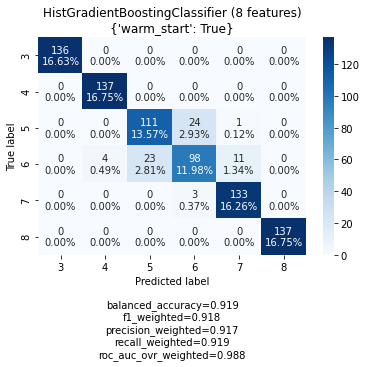

In [16]:
automl3.getBestConfusionMatrix();

# <b>5. Comparação entre os modelos</b>

<p style="text-align: justify; text-indent:50px;">A tabela abaixo sumariza os melhores resultados por experimento:</p>
<table style="border-collapse:collapse;border-spacing:0" class="tg"><thead><tr><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Experimento</th><th style="background-color:#d7d5d5;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Algoritmo</th><th style="background-color:#d7d5d5;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Parâmetros</th><th style="background-color:#d7d5d5;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Tempo de <br>Treinamento (s)</th><th style="background-color:#d7d5d5;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Tempo <br>de Predição (s)</th><th style="background-color:#d7d5d5;border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Memória<br>Máxima (Mb)</th><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Acurácia</th><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">F1 Score</th><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Precision</th><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Recall</th><th style="background-color:#d7d5d5;border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:middle;word-break:normal">Curva ROC</th></tr></thead><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">01</span><br>Config. <br>trabalho</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">SVM<br>(11 features)</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">{'C': 1000, 'degree': 3<br>, 'gamma': 'scale'<br>, 'kernel': 'poly'<br>, 'probability': True}</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">149.7</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.00015</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">246.8</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.479180</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.622245</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.633508</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.633508</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.750815</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">02</span><br>AutoML <br>Default</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">SVM<br>(8 features)</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">{'C': 10.0<br>, 'class_weight': 'balanced'<br>, 'gamma': 'scale'<br>, 'probability': True}</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.4</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.0005</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2405.7</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.515960</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.511368</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.576183</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.478125</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.763072</td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:bold">03</span><br>AutoML<br>Balanceado</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">HistGradientBoosting<br>(8 features)</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:left;vertical-align:top;word-break:normal">{'warm_start': True}</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">5.9</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.0002</td><td style="border-color:inherit;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">2221.6</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.919118</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.917752</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.917040</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.919315</td><td style="border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal">0.988021</td></tr></tbody></table>
<tr></tr>
</table>
<p style="text-align: justify; text-indent:50px;">Tomando-se como base os resultados do experimento 01, que manteve as configurações de algoritmos e parâmetros sugeridos na especificação do trabalho, o melhor resultado foi obtido pelo experimento 03. Isso se deveu, principalmente, à aplicação da técnica de balanceamento de classes, especificamente com o método <i>RandomOverSampler</i>.</p>
<p style="text-align: justify; text-indent:50px;">Outro fator importante é o algoritmo, no caso, o Histogram-Based Gradient Boosting, que é uma técnica que usa árvores de decisão em um método <i>ensemble</i>. </p>

# <b>Referências</b>
* Bruce, Andrew, and Peter Bruce. Estatística Prática para Cientistas de Dados. Alta Books, 2019.
* Carvalho, André, et al. Inteligência Artificial–uma abordagem de aprendizado de máquina. Rio de Janeiro: LTC, 2011.
* Deng, Naiyang, Yingjie Tian, and Chunhua Zhang. Support vector machines: optimization based theory, algorithms, and extensions. CRC press, 2012, p. Xxiii
* Dhiraj. “Top 5 Advantages and Disadvantages of Decision Tree Algorithm | by Dhiraj K | Medium.” Medium, Medium, 26 May 2019, https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a.
* Ferreira, Carlos A. “MLP Classifier. Carlos A. Ferreira, Ciência Da… | by Carlos A. Ferreira | Medium.” Medium, Medium, 3 Feb. 2019, https://medium.com/@carlosalbertoff/mlp-classifier-526978d1c638.
* Gomes, A.M. <b>Experimental Automl library, which uses genetic algorithm, multiprocessing and hyper-parameter optimization to solve supervised learning problems</b>. Disponível em <https://github.com/andersonmgomes/automl>. Acesso em: 20 dez. 2021.
* Inferir, Publicado. “Algoritmo KNN Para Classificação – Inferir Estatística.” Inferir Estatística – Consultoria e Cursos, Inferir Estatística, 21AD, https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/.
* Lemaître, Guillaume, Fernando Nogueira, and Christos K. Aridas. "Imbalanced-learn: A python toolbox to tackle the curse of imbalanced datasets in machine learning." The Journal of Machine Learning Research 18.1 (2017): 559-563.
* Mitchell, Tom. Machine learning. McGraw-Hill, 1997.
* “Naive Bayes Classifier: Pros & Cons, Applications & Types Explained | UpGrad Blog.” UpGrad Blog, https://www.facebook.com/UpGradGlobal/, 11 Dec. 2020, https://www.upgrad.com/blog/naive-bayes-classifier/.
* Wikipedia contributors. "Decision tree learning." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 31 Dec. 2021. Web. 16 Jan. 2022.
* Wikipedia contributors. "K-nearest neighbors algorithm." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 28 Nov. 2021. Web. 16 Jan. 2022.
* Wikipedia contributors. "Naive Bayes classifier." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 10 Jan. 2022. Web. 16 Jan. 2022.



In [17]:
#%load_ext notexbook
#%texify